In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('../data/osstate/extracted/states_2022-04-04-00.csv.gz', compression='gzip')
df.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
0,1649030400,7c02dc,-37.662643,145.395053,50.857154,38.840837,5.20192,AUM,False,False,False,4001.0,1615.44,1676.40,1.649030e+09,1.649030e+09
1,1649030400,4bcda5,51.315422,13.289487,212.396729,305.035400,NaN,SXS8VH,False,False,False,3212.0,12192.00,11818.62,1.649030e+09,1.649030e+09
2,1649030400,4bcc67,52.009878,10.625668,222.004883,123.469849,NaN,THY4RK,False,False,False,7601.0,7978.14,7795.26,1.649030e+09,1.649030e+09
3,1649030400,4bb467,51.396189,11.958468,136.096680,240.820312,NaN,MNB9346,False,False,False,3606.0,2628.90,2583.18,1.649030e+09,1.649030e+09
4,1649030400,4520c4,51.117604,6.894822,229.352295,258.612671,NaN,BCS55G,False,False,False,1000.0,10195.56,9989.82,1.649030e+09,1.649030e+09


In [4]:
# add an ident column by concatenating df['callsign'] and df['icao24']
df['ident'] = (df['callsign'].str.strip()+'_'+df['icao24'].str.strip())
# add a column rtime that is df['time'] - df['time'].min()
df['rtime'] = df['time'] - df['time'].min()
df.head(10)

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,ident,rtime
0,1649030400,7c02dc,-37.662643,145.395053,50.857154,38.840837,5.20192,AUM,False,False,False,4001.0,1615.44,1676.40,1.649030e+09,1.649030e+09,AUM_7c02dc,0
1,1649030400,4bcda5,51.315422,13.289487,212.396729,305.035400,NaN,SXS8VH,False,False,False,3212.0,12192.00,11818.62,1.649030e+09,1.649030e+09,SXS8VH_4bcda5,0
2,1649030400,4bcc67,52.009878,10.625668,222.004883,123.469849,NaN,THY4RK,False,False,False,7601.0,7978.14,7795.26,1.649030e+09,1.649030e+09,THY4RK_4bcc67,0
3,1649030400,4bb467,51.396189,11.958468,136.096680,240.820312,NaN,MNB9346,False,False,False,3606.0,2628.90,2583.18,1.649030e+09,1.649030e+09,MNB9346_4bb467,0
4,1649030400,4520c4,51.117604,6.894822,229.352295,258.612671,NaN,BCS55G,False,False,False,1000.0,10195.56,9989.82,1.649030e+09,1.649030e+09,BCS55G_4520c4,0
5,1649030400,4ba8d0,49.376936,11.491334,236.586670,121.755981,0.00000,THY1DU,False,False,False,1176.0,11277.60,10927.08,1.649030e+09,1.649030e+09,THY1DU_4ba8d0,0
6,1649030400,3c4593,51.818111,9.331920,248.568604,101.821289,NaN,BOX193,False,False,False,2274.0,8907.78,8717.28,1.649030e+09,1.649030e+09,BOX193_3c4593,0
7,1649030400,48b204,50.916224,12.840486,227.317627,124.766235,NaN,BCS50Q,False,False,False,1000.0,7810.50,7589.52,1.649030e+09,1.649030e+09,BCS50Q_48b204,0
8,1649030400,7c7f14,-37.217331,145.824455,93.220887,37.375807,0.00000,ZDY,False,False,False,3236.0,2727.96,2781.30,1.649030e+09,1.649030e+09,ZDY_7c7f14,0
9,1649030400,4bb463,49.729850,12.051637,262.698242,187.651978,NaN,SOP7116,False,False,False,1000.0,9448.80,9197.34,1.649030e+09,1.649030e+09,SOP7116_4bb463,0


In [5]:
# Drop the columns we don't need
df.drop(columns=['onground', 'alert', 'spi', 'squawk'], inplace=True)

In [6]:
idents = df['ident'].unique()
print('Number of unique idents:', len(idents))

Number of unique idents: 9934


## One aircraft

In [23]:
# Get the first ident
ident = 'BCS55G_4520c4' # this is a good ident to use for testing
ident = 'SOP7116_4bb463'
df_ident = df[df['ident'] == ident]
df_ident.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,baroaltitude,geoaltitude,lastposupdate,lastcontact,ident,rtime
55171,1649030510,4bb463,49.461473,11.999149,265.640969,187.455327,-0.32512,SOP7116,9448.80,9189.72,1.649031e+09,1.649031e+09,SOP7116_4bb463,110
61352,1649030520,4bb463,49.451019,11.994613,265.640969,187.455327,0.00000,SOP7116,9441.18,9182.10,1.649031e+09,1.649031e+09,SOP7116_4bb463,120
66406,1649030530,4bb463,49.426025,11.989605,265.640969,187.455327,0.32512,SOP7116,9448.80,9189.72,1.649031e+09,1.649031e+09,SOP7116_4bb463,130
72630,1649030540,4bb463,49.401654,11.984711,265.640969,187.455327,0.00000,SOP7116,9448.80,9197.34,1.649031e+09,1.649031e+09,SOP7116_4bb463,140
77595,1649030550,4bb463,49.378189,11.980027,265.640969,187.455327,0.00000,SOP7116,9448.80,9197.34,1.649031e+09,1.649031e+09,SOP7116_4bb463,150


In [24]:
def forward_fill(arr):
    """
    Forward fill missing values in an array.

    Parameters:
    arr (numpy.ndarray): The input array.

    Returns:
    numpy.ndarray: The array with missing values forward filled.
    """
    mask = np.isnan(arr)
    idx = np.where(~mask, np.arange(len(arr)), 0)
    np.maximum.accumulate(idx, out=idx)
    return arr[idx]

In [25]:
import matplotlib.pyplot as plt
from geo.drift_compensation import get_track_drift_rate

Text(0.5, 1.0, 'Altitude of SOP7116_4bb463')

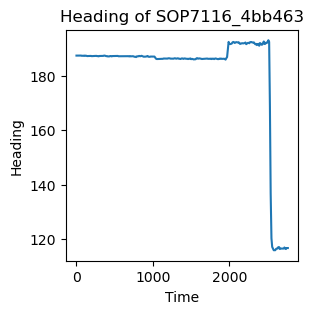

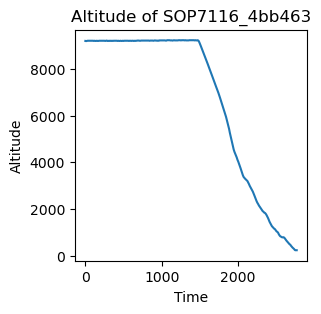

In [26]:
# Plot the heading (actually flight track) of the aircraft with time
rlastposupdate = df_ident['lastposupdate'].values - df_ident['lastposupdate'].min()
hdg = forward_fill(df_ident['heading'].values)
vel = forward_fill(df_ident['velocity'].values) / 1000 # km/s
lat = forward_fill(df_ident['lat'].values)
lon = forward_fill(df_ident['lon'].values)
alt = forward_fill(df_ident['geoaltitude'].values)
vrate = forward_fill(df_ident['vertrate'].values)
plt.figure(figsize=(3,3))
plt.plot(rlastposupdate, hdg)
plt.xlabel('Time')
plt.ylabel('Heading')
plt.title(f'Heading of {ident}')

# Plot the geoaltitude of the aircraft with time
plt.figure(figsize=(3,3))
plt.plot(rlastposupdate, alt)
plt.xlabel('Time')
plt.ylabel('Altitude')
plt.title(f'Altitude of {ident}')

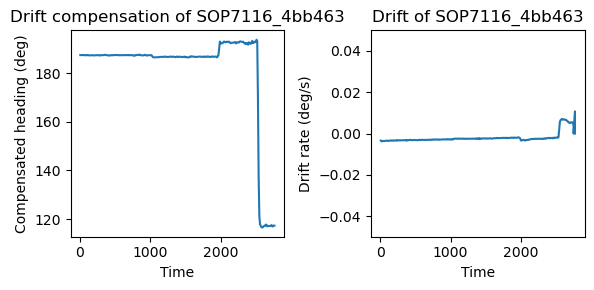

In [27]:
# Compute the drift compensation
track_drift = np.zeros_like(hdg)
cumul_drift = 0
hdg_compensated = np.zeros_like(hdg)
for i in range(1, len(hdg)):
    # We will use the last time's value to compensate the drift for this time
    track_drift[i] = get_track_drift_rate(lat[i-1], lon[i-1], hdg[i-1]) * vel[i-1] * (rlastposupdate[i] - rlastposupdate[i-1])
    if np.abs(track_drift[i]) > 1:
        print(f'lat: {lat[i-1]}, lon: {lon[i-1]}, hdg: {hdg[i-1]}, vel: {vel[i-1]}, time: {rlastposupdate[i]}')
        print(f'drift: {track_drift[i]}')
        print(f'x: {get_track_drift_rate(lat[i-1], lon[i-1], hdg[i-1])}')
    cumul_drift += track_drift[i]
    hdg_compensated[i] = (hdg[i] - cumul_drift) % 360


# Plot the drift compensation
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(rlastposupdate[1:], hdg_compensated[1:])
plt.xlabel('Time')
plt.ylabel('Compensated heading (deg)')
plt.title(f'Drift compensation of {ident}')

plt.subplot(1,2,2)
plt.plot(rlastposupdate[1:], track_drift[1:])
plt.xlabel('Time')
plt.ylabel('Drift rate (deg/s)')
plt.title(f'Drift of {ident}')
plt.ylim(-0.05, 0.05)

plt.tight_layout() 

In [28]:


def take_off_detection(alt: np.ndarray, thr: float = 500) -> int:
    """
    Detects the time step when the aircraft takes off based on altitude data.

    Parameters:
    alt (np.ndarray): Array of altitude values.
    thr (float): Altitude threshold for detecting take-off. Default is 500.

    Returns:
    int: The time step when the aircraft takes off. Returns -1 if no take-off is detected.
    """

    t_above_thr = np.where(alt > thr, 1, 0) # Find the first time the altitude is above the threshold
    t_above_thr_diff = np.diff(t_above_thr) # Find the difference between consecutive time steps when the altitude is above the threshold
    if len(t_above_thr) == 0:
        return -1 # The aircraft never goes above the threshold so it is on the ground and this is not a take-off
    # Take off is the moment when the aircraft goes above the threshold 
    t_takeoff = np.where(t_above_thr_diff > 0.5)[0]
    if len(t_takeoff) == 0:
        return -1
    return t_takeoff[0] + 1 # Return the time step when the aircraft takes off

def landing_detection(alt: np.ndarray, thr: float = 500) -> int:
    """
    Detects the time step when the aircraft lands based on altitude data.

    Parameters:
    alt (np.ndarray): Array of altitude values.
    thr (float): Altitude threshold for detecting take-off. Default is 500.

    Returns:
    int: The time step when the aircraft lands. Returns -1 if no landing is detected.
    """

    t_above_thr = np.where(alt > thr, 1, 0) # Find the first time the altitude is above the threshold
    t_above_thr_diff = np.diff(t_above_thr) # Find the difference between consecutive time steps when the altitude is above the threshold
    if len(t_above_thr) == 0:
        return -1 # The aircraft never goes above the threshold so it is on the ground and this is not a take-off
    # Take off is the moment when the aircraft goes above the threshold 
    t_landing = np.where(t_above_thr_diff < -0.5)[0]
    if len(t_landing) == 0:
        return -1
    return t_landing[0] + 1 # Return the time step when the aircraft takes off

# UNIT TEST the functions
# Note this is not related to the flight we are testing, just to make sure the functions work
print(take_off_detection(np.array([700, 600, 500, 400, 200, 100, 0])))
print(landing_detection(np.array([700, 600, 500, 400, 200, 100, 0])))
print('Should give -1 and 2! NOTE THAT THESE ARE NOT ACTUAL TAKING-OFF AND LANDING TIMES! THIS IS A UNIT TEST FUNCTION!')

-1
2
Should give -1 and 2! NOTE THAT THESE ARE NOT ACTUAL TAKING-OFF AND LANDING TIMES! THIS IS A UNIT TEST FUNCTION!


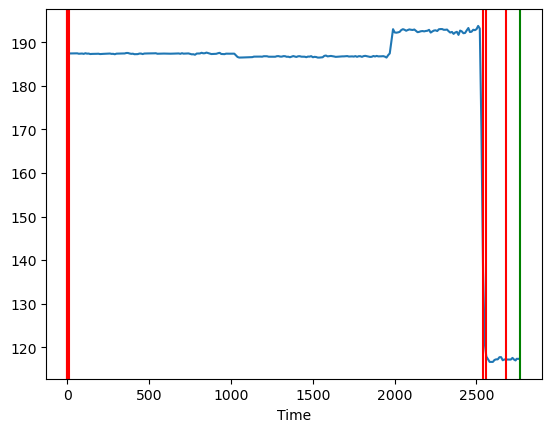

In [29]:
# Get changepoints in the heading
from changepy import pelt
from changepy.costs import normal_mean

# Get the changepoints
changepoints = pelt(normal_mean(hdg_compensated, 1), len(hdg_compensated))

# Write down the turning points
tp_lat = []
tp_lon = []
tp_time = []
tp_vel = []
tp_alt = []

# Detection of takeoffs
t_takeoff = take_off_detection(alt)
t_landing = landing_detection(alt)

# One final changepoint at the end of the flight or when the aircraft lands
if t_landing != -1:
    changepoints = np.append(changepoints, t_landing)
    # Delete all the changepoints after the aircraft landed
    changepoints = changepoints[changepoints <= t_landing] 
    flight_not_landed_yet = False
else:
    changepoints = np.append(changepoints, len(hdg_compensated)-1)

if t_takeoff != -1:
    changepoints = np.insert(changepoints, 0, t_takeoff)
    # Delete all the changepoints before the aircraft took off
    changepoints = changepoints[changepoints >= t_takeoff]

for i in range(len(changepoints)):
    tp_lat.append(lat[changepoints[i]])
    tp_lon.append(lon[changepoints[i]])
    tp_time.append(rlastposupdate[changepoints[i]])
    tp_vel.append(vel[changepoints[i]])
    tp_alt.append(alt[changepoints[i]])
    
    # if i == 0:
    #     tp_from_hdg.append(np.mean(hdg_compensated[:changepoints[i]]))
    # else:
    #     tp_from_hdg.append(np.mean(hdg_compensated[changepoints[i-1]:changepoints[i]]))
    # tp_to_hdg.append(np.mean(hdg_compensated[changepoints[i]:changepoints[i+1]]))

# The beginning and the end of the flight are also changepoints
tp_lat.insert(0, lat[0])
tp_lon.insert(0, lon[0])
tp_time.insert(0, rlastposupdate[0])
tp_vel.insert(0, vel[0])
tp_alt.insert(0, alt[0])
changepoints = np.insert(changepoints, 0, 0)

tp_lat.append(lat[-1])
tp_lon.append(lon[-1])
tp_time.append(rlastposupdate[-1])
tp_vel.append(vel[-1])
tp_alt.append(alt[-1])
changepoints = np.append(changepoints, len(hdg_compensated)-1)

# Plot the changepoints 
plt.plot(rlastposupdate[1:], hdg_compensated[1:])
for i, cp in enumerate(changepoints):
    if i == len(changepoints)-1:
        plt.axvline(x=rlastposupdate[cp], color='g')
    else:
        plt.axvline(x=rlastposupdate[cp], color='r')
    plt.xlabel('Time')

0 0.0 0.0
Merging 0 and 1
0 0.0 9.417999982833862
Merging 0 and 1
0 4.708999991416931 2540.1549999713898
1 2540.1549999713898 2560.0339999198914
Merging 1 and 2
1 2550.0944999456406 2680.2569999694824
2 2680.2569999694824 2764.664999961853


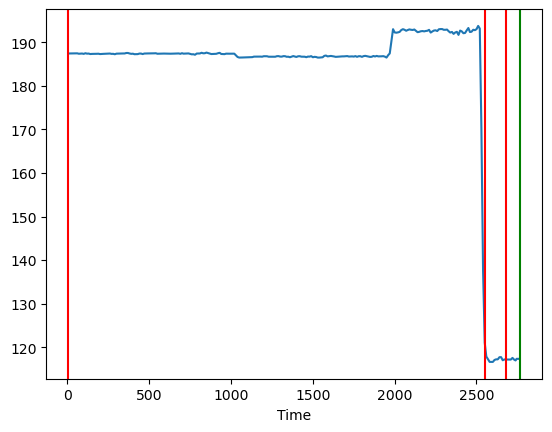

In [30]:
# Merge changepoints that are too close to each other
i = 0
while i < len(tp_lat)-1:
    print(i, tp_time[i], tp_time[i+1])
    if (tp_time[i+1] - tp_time[i]) < 60:
        print(f'Merging {i} and {i+1}')
        tp_lat[i] = (tp_lat[i] + tp_lat[i+1]) / 2
        tp_lon[i] = (tp_lon[i] + tp_lon[i+1]) / 2
        tp_time[i] = (tp_time[i] + tp_time[i+1]) / 2
        tp_vel[i] = (tp_vel[i] + tp_vel[i+1]) / 2
        tp_alt[i] = (tp_alt[i] + tp_alt[i+1]) / 2
        # tp_from_hdg[i] = (tp_from_hdg[i] + tp_from_hdg[i+1]) / 2
        # tp_to_hdg[i] = (tp_to_hdg[i] + tp_to_hdg[i+1]) / 2
        tp_lat.pop(i+1)
        tp_lon.pop(i+1)
        tp_time.pop(i+1)
        # tp_from_hdg.pop(i+1)
        # tp_to_hdg.pop(i+1)
    else:
        i += 1

# Add takeoff and landing to the changepoints
if t_takeoff != -1:
    if len(tp_time) > 0:
        if tp_time[0] > rlastposupdate[t_takeoff]:
            print('Adding takeoff changepoint')
            tp_lat.insert(0, lat[t_takeoff])
            tp_lon.insert(0, lon[t_takeoff])
            tp_time.insert(0, rlastposupdate[t_takeoff])
            tp_vel.insert(0, vel[t_takeoff])
            tp_alt.insert(0, alt[t_takeoff])
    # tp_from_hdg.insert(0, hdg_compensated[0])
    # tp_to_hdg.insert(0, hdg_compensated[t_takeoff])

if t_landing != -1:
    if len(tp_time) > 0:
        if tp_time[-1] < rlastposupdate[t_landing]:
            print('Adding landing changepoint')
            tp_lat.append(lat[t_landing])
            tp_lon.append(lon[t_landing])
            tp_time.append(rlastposupdate[t_landing])
            tp_vel.append(vel[t_landing])
            tp_alt.append(alt[t_landing])
    # tp_from_hdg.append(hdg_compensated[t_landing])
    # tp_to_hdg.append(hdg_compensated[-1])

# Plot the changepoints 
plt.plot(rlastposupdate[1:], hdg_compensated[1:])
for i, cp in enumerate(tp_time):
    if i == len(tp_time)-1:
        plt.axvline(x=tp_time[i], color='g')
    else:
        plt.axvline(x=tp_time[i], color='r')
    plt.xlabel('Time')

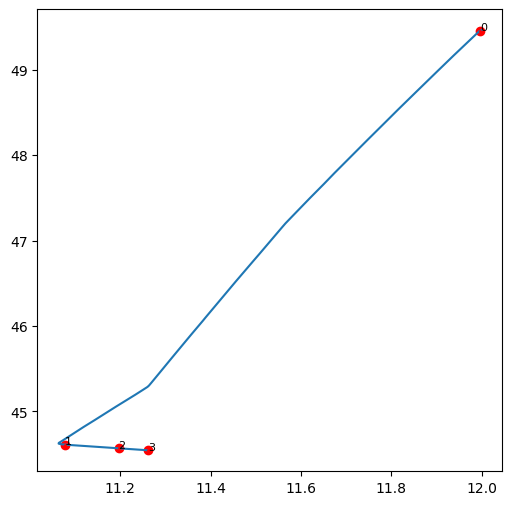

In [31]:
# Reconstruct the approximate flight path
plt.figure(figsize=(6,6))
plt.plot(lon, lat)
plt.plot(tp_lon, tp_lat, 'ro', markersize=1)
for i in range(len(tp_lat)):
   plt.scatter(tp_lon[i], tp_lat[i], color='r')
   plt.text(tp_lon[i], tp_lat[i], f'{i}', fontsize=8)

We actually do not care about the heading because we only rely on the the flight track to derive changepoints. Afterwards, everything is connected through great circle path.

## Altitude changepoint

Text(0.5, 1.0, 'Altitude of SOP7116_4bb463')

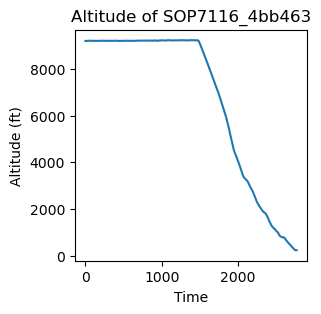

In [32]:
plt.figure(figsize=(3,3))
plt.plot(rlastposupdate, alt)
plt.xlabel('Time')
plt.ylabel('Altitude (ft)')
plt.title(f'Altitude of {ident}')

Text(0.5, 1.0, 'Altitude of SOP7116_4bb463')

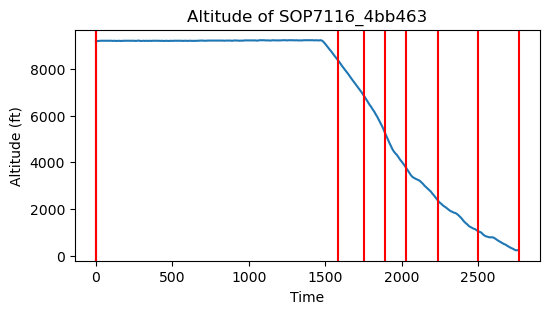

In [41]:
# Detect changepoints in altitude
from changepy.costs import normal_mean
from changepy import pelt

# Get the changepoints
changepoints = pelt(normal_mean(alt, 1000), len(alt))

# Add the initial and final changepoints
changepoints = np.insert(changepoints, 0, 0)
changepoints = np.append(changepoints, len(alt)-1)

# Plot the changepoints
plt.figure(figsize=(6,3))
plt.plot(rlastposupdate, alt)
for cp in changepoints:
    plt.axvline(x=rlastposupdate[cp], color='r')
plt.xlabel('Time')
plt.ylabel('Altitude (ft)')
plt.title(f'Altitude of {ident}')


0 0.0 0.0
Merging 0 and 1
0 0.0 1580.0279998779297
1 1580.0279998779297 1750.2549998760223
2 1750.2549998760223 1889.9699997901917
3 1889.9699997901917 2030.3449997901917
4 2030.3449997901917 2240.12299990654
5 2240.12299990654 2500.3980000019073
6 2500.3980000019073 2764.664999961853


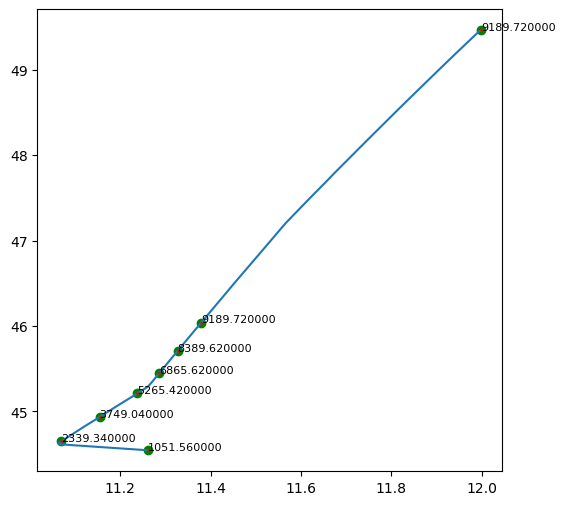

In [51]:
dp_time = []
dp_lat = []
dp_lon = []
dp_alt = []
dp_vel = []

for i in range(len(changepoints)):
    dp_time.append(rlastposupdate[changepoints[i]])
    dp_lat.append(lat[changepoints[i]])
    dp_lon.append(lon[changepoints[i]])
    dp_alt.append(alt[changepoints[i]])
    dp_vel.append(vel[changepoints[i]])

# Merge changepoints that are too close to each other
i = 0
while i < len(dp_lat)-1:
    print(i, dp_time[i], dp_time[i+1])
    if (dp_time[i+1] - dp_time[i]) < 120:
        print(f'Merging {i} and {i+1}')
        dp_lat[i] = (dp_lat[i] + dp_lat[i+1]) / 2
        dp_lon[i] = (dp_lon[i] + dp_lon[i+1]) / 2
        dp_time[i] = (dp_time[i] + dp_time[i+1]) / 2
        dp_alt[i] = (dp_alt[i] + dp_alt[i+1]) / 2
        dp_vel[i] = (dp_vel[i] + dp_vel[i+1]) / 2
        dp_lat.pop(i+1)
        dp_lon.pop(i+1)
        dp_time.pop(i+1)
        dp_alt.pop(i+1)
        dp_vel.pop(i+1)
    else:
        i += 1

# Plot the changepoints
plt.figure(figsize=(6,6))
plt.plot(lon, lat)
plt.plot(dp_lon, dp_lat, 'ro', markersize=1)
for i in range(len(dp_lat)):
   plt.scatter(dp_lon[i], dp_lat[i], color='g')
   plt.text(dp_lon[i], dp_lat[i], f'{alt[changepoints[i]]:2f}', fontsize=8)

# Test the library functions

In [52]:
df_ident = df[df['ident'] == idents[6]]
df.dropna(how='any', inplace=True)

In [53]:
df_ident.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,baroaltitude,geoaltitude,lastposupdate,lastcontact,ident,rtime
33276,1649030470,3c4593,51.786292,9.575729,245.584380,101.969017,-9.75360,BOX193,8336.28,8168.64,1.649030e+09,1.649030e+09,BOX193_3c4593,70
259363,1649030860,3c4593,51.632953,10.817564,210.226393,93.226494,0.00000,BOX193,5181.60,5074.92,1.649031e+09,1.649031e+09,BOX193_3c4593,460
483161,1649031240,3c4593,51.593353,11.899975,152.109356,93.878525,-3.90144,BOX193,3337.56,3291.84,1.649031e+09,1.649031e+09,BOX193_3c4593,840
517787,1649031300,3c4593,51.587860,12.030772,150.056357,93.931671,-6.82752,BOX193,2910.84,2887.98,1.649031e+09,1.649031e+09,BOX193_3c4593,900
524164,1649031310,3c4593,51.587002,12.051468,149.543128,93.945186,-7.15264,BOX193,2842.26,2819.40,1.649031e+09,1.649031e+09,BOX193_3c4593,910


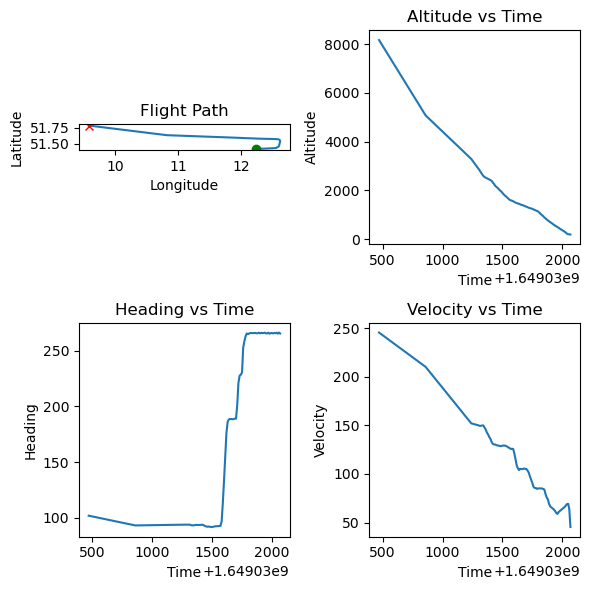

<Figure size 640x480 with 0 Axes>

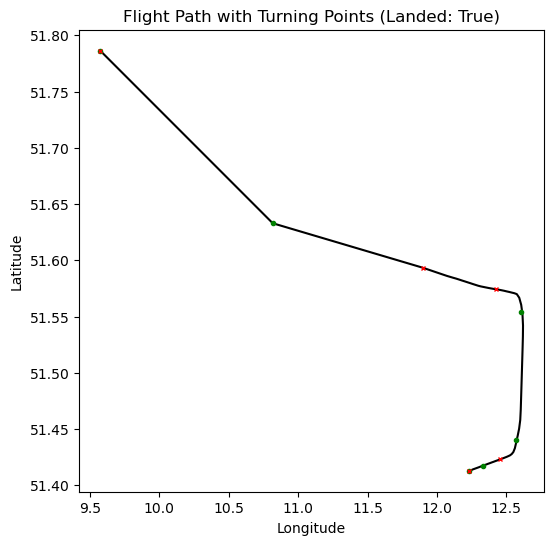

In [55]:
from get_turn import get_turning_points, plot_changepoints, TurnAndRise
from potters import plot_df
plot_df(df_ident)

turns:TurnAndRise = get_turning_points(df_ident)
plt.figure()
plot_changepoints(turns, df_ident)


In [56]:
turns['landed']

True